<a href="https://colab.research.google.com/github/KhangRefi/Data-Science/edit/main/Import&ExportData/Exercise_withWebAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [2]:
def get_historical_price(symbol, exchange, after):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-07-12 09:57:57.051054')

In [4]:
btc = get_historical_price('btc', 'bitfinex', after=last_week)

In [5]:
eth = get_historical_price('eth', 'bitfinex', after=last_week)

In [6]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-12 10:00:00,19761.0,19785.0,19543.898858,19575.151206,149.560142,2.935098e+06
2022-07-12 11:00:00,19578.0,19695.0,19576.000000,19584.000000,133.477197,2.618706e+06
2022-07-12 12:00:00,19592.0,19803.0,19581.000000,19762.761372,765.432315,1.509170e+07
2022-07-12 13:00:00,19758.0,19942.0,19758.000000,19853.000000,182.611139,3.624698e+06
2022-07-12 14:00:00,19855.0,19981.0,19731.000000,19748.647127,294.381719,5.856194e+06


In [7]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,20722.593517,20856.311730,20610.030030,20735.595480,263.372989,5.440993e+06
std,846.923241,867.871017,830.201262,848.415314,355.123709,7.104774e+06
min,19170.000000,19344.000000,18912.596920,19172.633254,12.277629,2.542174e+05
25%,19878.000000,20026.359848,19824.000000,19885.000000,59.733577,1.257658e+06
50%,20752.011566,20883.000000,20683.000000,20765.460744,157.272771,3.087799e+06
75%,21289.000000,21380.000000,21175.000000,21296.000000,311.727253,6.635199e+06
max,22671.000000,22958.000000,22210.000000,22672.000000,3274.866021,6.337100e+07


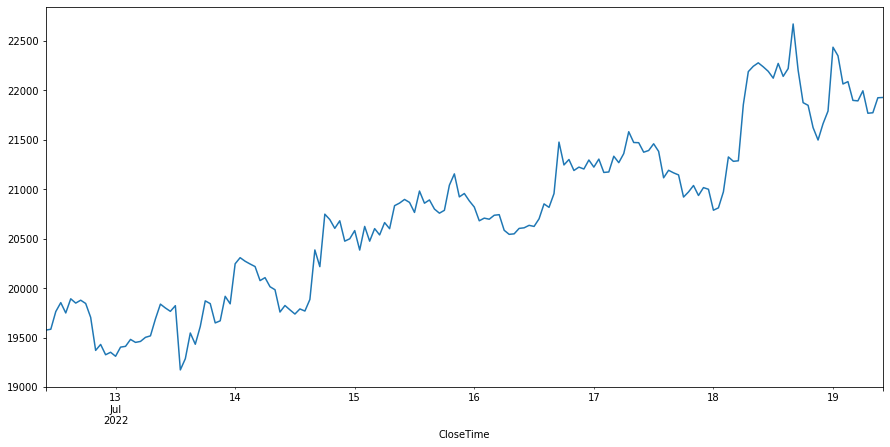

In [8]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [9]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-12 10:00:00,1066.340618,1068.300000,1053.0,1053.732584,1230.293351,1.303699e+06
2022-07-12 11:00:00,1053.600000,1064.011124,1053.5,1057.100000,1615.990988,1.710092e+06
2022-07-12 12:00:00,1056.800000,1071.500000,1056.0,1064.800000,4987.537623,5.313262e+06
2022-07-12 13:00:00,1064.800000,1074.200000,1064.8,1071.351617,580.476106,6.208248e+05
2022-07-12 14:00:00,1071.451837,1081.400000,1064.9,1065.800000,2092.980948,2.246070e+06


In [10]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,1245.806291,1259.473856,1236.557994,1248.543069,3256.936703,4.023114e+06
std,154.789525,159.020315,152.233379,155.736852,7323.019457,8.068896e+06
min,1030.900000,1045.900000,1005.700000,1030.883767,170.570928,1.804536e+05
25%,1090.300000,1100.500000,1082.400000,1090.563055,844.351089,9.508762e+05
50%,1218.500000,1224.992114,1209.727854,1219.512195,1638.186237,1.957612e+06
75%,1356.492969,1367.800000,1347.300000,1357.600000,3327.737172,4.220448e+06
max,1580.900000,1630.000000,1540.700000,1581.300000,71409.640981,7.357595e+07


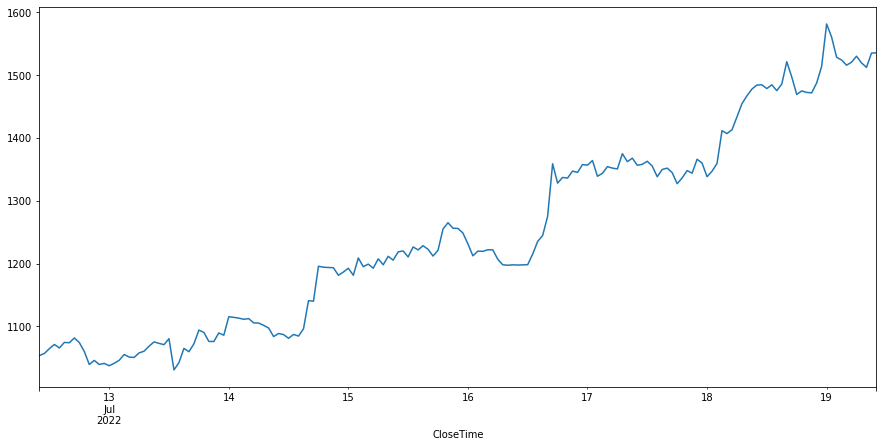

In [11]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [12]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [13]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [14]:
eth.to_excel(writer, sheet_name='Ether')

In [15]:
writer.save()